In [4]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [5]:
df = pd.read_csv(os.path.join("..", "Resources", "WMT.csv"))
df.head()

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,2014-01-24,65.2892,65.6300,64.8524,65.0184,9455979,9455979,-0.471782,-0.720,59.7206,"Jan 24, 14",0.000000
1,2014-01-27,64.7650,64.9747,64.5029,64.7825,9105139,9105139,-0.235889,-0.363,64.7739,"Jan 27, 14",-0.003628
2,2014-01-28,64.8786,65.8746,64.7388,65.2368,6035231,6035231,0.454305,0.701,65.3045,"Jan 28, 14",0.003359
3,2014-01-29,65.7785,65.8484,64.7126,64.7388,8440854,8440854,-0.497990,-0.763,61.0517,"Jan 29, 14",-0.004300
4,2014-01-30,65.1232,65.6037,64.9660,65.3067,6742046,6742046,0.567883,0.877,65.2975,"Jan 30, 14",0.004434


In [6]:
unfilteredData = df.drop(columns=["volume", "unadjustedVolume", "change", "changePercent", "vwap", "label", "changeOverTime"])
unfilteredData.head()

,date,open,high,low,close
0,2014-01-24,65.2892,65.6300,64.8524,65.0184
1,2014-01-27,64.7650,64.9747,64.5029,64.7825
2,2014-01-28,64.8786,65.8746,64.7388,65.2368
3,2014-01-29,65.7785,65.8484,64.7126,64.7388
4,2014-01-30,65.1232,65.6037,64.9660,65.3067


In [7]:
lastIndex = len(unfilteredData)
print(lastIndex)

1258


In [8]:
startDate = unfilteredData.loc[unfilteredData["date"] == "2018-06-01"]
startDateIndex = startDate.index.tolist()
print(startDateIndex[0])

1096


In [9]:
filteredData = unfilteredData.loc[startDateIndex[0]:lastIndex]

In [10]:
filteredData.head()

,date,open,high,low,close
1096,2018-06-01,82.1124,82.4881,81.9245,82.0629
1097,2018-06-04,82.5673,84.5647,82.3695,84.4658
1098,2018-06-05,84.4955,84.5152,83.3089,83.6747
1099,2018-06-06,84.0011,84.1961,83.4078,83.6154
1100,2018-06-07,83.8330,84.8020,83.7440,84.0011


In [11]:
filteredData.reset_index(inplace=True, drop=True)
filteredData.head()

,date,open,high,low,close
0,2018-06-01,82.1124,82.4881,81.9245,82.0629
1,2018-06-04,82.5673,84.5647,82.3695,84.4658
2,2018-06-05,84.4955,84.5152,83.3089,83.6747
3,2018-06-06,84.0011,84.1961,83.4078,83.6154
4,2018-06-07,83.8330,84.8020,83.7440,84.0011


In [12]:
filteredData.set_index('date', inplace = True)
filteredData.head()

,open,high,low,close
date,,,,
2018-06-01,82.1124,82.4881,81.9245,82.0629
2018-06-04,82.5673,84.5647,82.3695,84.4658
2018-06-05,84.4955,84.5152,83.3089,83.6747
2018-06-06,84.0011,84.1961,83.4078,83.6154
2018-06-07,83.8330,84.8020,83.7440,84.0011


In [13]:
data = filteredData.values
data.shape

(162, 4)

In [14]:
target = filteredData["close"]
target_names = ["negative", "positive"]

In [36]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

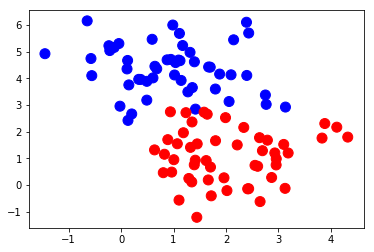

In [37]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=.95)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
plt.show()

In [38]:
from sklearn.svm import SVC 
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

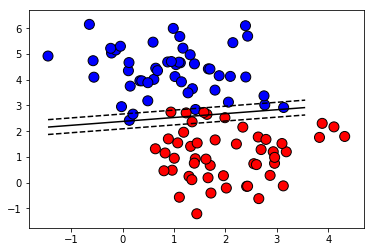

In [39]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["blue", "red"]))

             precision    recall  f1-score   support

       blue       0.83      1.00      0.91        10
        red       1.00      0.87      0.93        15

avg / total       0.93      0.92      0.92        25



In [42]:
filteredData.dtypes

open     float64
high     float64
low      float64
close    float64
dtype: object

In [43]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.9733333333333334
Testing Data Score: 0.92
